In [34]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
## ignore errors 
import warnings
warnings.filterwarnings("ignore")

[0.13025917 0.         0.06512959 0.         0.06512959 0.
 0.         0.13025917 0.19538876 0.06512959 0.06512959 0.13025917
 0.19538876 0.         0.         0.         0.06512959 0.13025917
 0.         0.06512959]
[-8.53442284 -7.76672258 -6.99902231 -6.23132205 -5.46362179 -4.69592153
 -3.92822127 -3.16052101 -2.39282074 -1.62512048 -0.85742022 -0.08971996
  0.6779803   1.44568056  2.21338082  2.98108109  3.74878135  4.51648161
  5.28418187  6.05188213  6.81958239]
<a list of 20 Patch objects>


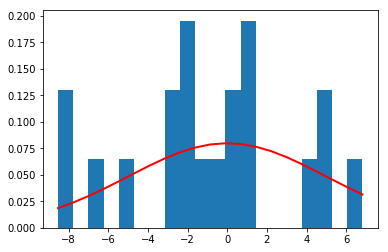

In [6]:
sample = np.random.normal(0, 5, 20)
count, bins, patch = plt.hist(x=sample, bins=20, density=True)
plt.plot(bins, 1/(5 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 0)**2 / (2 * 5**2) ), linewidth=2, color='r')
print(count)
print(bins)
print(patch)

In [ ]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.title('Histogram along with the PDF', lo

In [31]:
sigma = 11
mu = 50
# x_bar = 60 
alpha = 0.09
z_crit = round(stats.norm.ppf(q=(1-alpha)), 2)
z_crit


1.34

In [32]:
x_bar = -z_crit*(sigma/np.sqrt(36)) + 50
x_bar

47.54333333333334

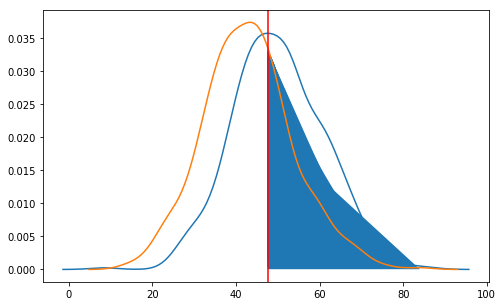

In [57]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
samp = stats.norm.rvs(loc=mu, scale=sigma, size=500)
sns.distplot(samp, hist=False, bins=[30,70])
samp1 = stats.norm.rvs(loc=43, scale=sigma, size=500)
ys = stats.norm.pdf(samp1, loc=43, scale=sigma)
sns.distplot(samp1, hist=False)
ax.axvline(x_bar, color='red')
ax.fill_betweenx(ys, samp1, x_bar, where=samp1>x_bar)

In [47]:
stats.norm.pdf(x_bar,loc=mu, scale=sigma)

0.0353741944541576

In [124]:
ys = stats.norm.pdf(samp1,loc=50, scale=20)

In [58]:
stats.norm.ppf(q=(1-0.09))

1.3407550336902165

In [67]:
mu, sigma, n = 50, 21, 36
alpha = 0.09
ex = np.random.normal(loc=50, scale=21, size=36)
z_crit = stats.norm.ppf(q=(1-alpha))
x_bar = -z_crit * (sigma/np.sqrt(n)) + mu
print('x_bar', x_bar)
mu_note = 40
print('mu_note', mu_note)
z_stat = (x_bar - mu_note)/(sigma/np.sqrt(n))
print(z_stat)
p_val = stats.norm.pdf(z_stat, loc=mu, scale=sigma)
print('Probability Type II error', p_val)
print("Power:", 1-p_val)

x_bar 45.30735738208424
mu_note 40
1.5163878234526404
Probability Type II error 0.0013220005786778962
Power: 0.9986779994213221


## T-Test

In [69]:
mu, n, x_bar, s, alpha = 0.95, 25, 1.00, 0.18, 0.05
print('mu:',mu, 'size:', n, 'x_bar:', x_bar, 'sample std:', s, 'alpha:', alpha)

mu: 0.95 size: 25 x_bar: 1.0 sample std: 0.18 alpha: 0.05


In [71]:
t_stat = (x_bar - mu)/(s/np.sqrt(n))
print("t statistic = ", round(t_stat,3))

t statistic =  1.389


In [78]:
p_val = stats.t.sf(t_stat, df=n-1)
p_val = 2*p_val # two sided 
p_val

0.17762145994412712

In [80]:
stats.t.interval(alpha=alpha, df=n-1)

(-0.06336583755557332, 0.06336583753231745)

In [92]:
## or using t_critic 
t_crit = stats.t.ppf(1-alpha, df=n-1)
t_crit

1.7108820799094275

In [88]:
lower = mu - t_crit*(s/np.sqrt(n-1))
lower

0.8871381784122545

In [109]:
import random
random.randint(3, 30)

22

In [106]:
M = 0
for i in range(100):
    trials = random.randint(2, 30)
    if (trials.sum() >= 22):
        M += 1
M

AttributeError: 'int' object has no attribute 'sum'

In [97]:
M/100

0.02

In [123]:
g1 = np.array([84,57,63,99,72,46,76,91])
g2 = np.array([81,74,56,69,66,62,69,61,87,65,44,69])
from statsmodels.stats.weightstats import ttest_ind
t, p, dof = ttest_ind(g1, g2, alternative='larger', usevar='unequal')
print('t_statistic:', t, 'P_val:', 'dof:',dof)
# mu1, mu2= g1.mean(), g2.mean()

t_statistic: 0.9316147771711583 P_val: dof: 10.696428999751992


In [113]:
mu1, mu2

(73.5, 66.91666666666667)

In [114]:
from statsmodels.stats.weightstats import ttest_ind
t, p, dof = ttest_ind(g1, g2, alternative='larger', usevar='unequal')

In [115]:
print(t)

0.9316147771711583


In [116]:
print(p)

0.18604289277326536


In [117]:
print(dof)

10.696428999751992


In [118]:
s1_squared = g1.var(ddof = 1)
s2_squared = g2.var(ddof = 1)
n1, n2  = len(g1), len(g2)

sn1 = s1_squared/n1
sn2 = s2_squared/n2

df_num = (sn1 + sn2)**2
df_denom = (sn1)**2 / (n1-1) + (sn2)**2 / (n2-1)

df = df_num/df_denom

In [119]:
df

10.696428999751994

In [121]:
stats.ttest_ind(g1, g2, equal_var= False)

Ttest_indResult(statistic=0.9316147771711583, pvalue=0.3720857855465306)